# Lyrics Project Overview
### Process data
    remove duplicates 
### Try different vectorization strategies
    CountVector and Tfidf
### Lemmatization with spacy 
### Different upsampling and downsampling techinques
#### end - optimized pipeline

In [1]:
import pandas as pd
import json
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import jsonlines

In [3]:
list_artists = ['Queen', 'Muse', 'Janelle Monáe', 'Hot Chip', 'LCD Soundsystem','The Postal Service', 'Daft Punk', 'The Strokes']

In [4]:
df = pd.read_json('lyrics.jl', lines=True)

In [5]:
df

,artists,titles,lyrics
0,,,
1,,,
2,,,
3,,,
4,,,
...,...,...,...
5491,Smile,Doing All Right (...Revisited),Yesterday my life was in ruin\r\nNow today I k...
5492,Queen,Doing All Right,Yesterday my life was in ruin\r\nNow today I k...
5493,Queen,Somebody to Love,Can anybody find me somebody to love?\r\n\r\nO...
5494,"Queen, Brian May",Driven By You,Woh everything I do I do for you \r\nOw\r\nOh ...


In [6]:
df_fix = df[df.titles != '']

In [7]:
df_fix

,artists,titles,lyrics
7,Queen,Innuendo,One two three four\r\n\r\nOoh ooh\r\n\r\nWhile...
9,"David Bowie, Queen",Under Pressure,Mm ba ba de\r\nUm bum ba de\r\nUm bu bu bum da...
10,"David Bowie, Queen",Under Pressure,Mm ba ba de\r\nUm bum ba de\r\nUm bu bu bum da...
11,Queen,The Show Must Go On,"Empty spaces, what are we living for?\r\nAband..."
12,Queen,Don't Stop Me Now [Revisited],Tonight I'm gonna have myself \r\nA real good ...
...,...,...,...
5491,Smile,Doing All Right (...Revisited),Yesterday my life was in ruin\r\nNow today I k...
5492,Queen,Doing All Right,Yesterday my life was in ruin\r\nNow today I k...
5493,Queen,Somebody to Love,Can anybody find me somebody to love?\r\n\r\nO...
5494,"Queen, Brian May",Driven By You,Woh everything I do I do for you \r\nOw\r\nOh ...


In [8]:
df_fix.artists.str.contains('Queen')

7        True
9        True
10       True
11       True
12       True
        ...  
5491    False
5492     True
5493     True
5494     True
5495     True
Name: artists, Length: 5488, dtype: bool

In [9]:
#create a main artist column 
for artist in list_artists:
        df_fix.loc[df_fix.artists.str.contains(artist), 'main_artist']=artist

In [10]:
df_fix

,artists,titles,lyrics,main_artist
7,Queen,Innuendo,One two three four\r\n\r\nOoh ooh\r\n\r\nWhile...,Queen
9,"David Bowie, Queen",Under Pressure,Mm ba ba de\r\nUm bum ba de\r\nUm bu bu bum da...,Queen
10,"David Bowie, Queen",Under Pressure,Mm ba ba de\r\nUm bum ba de\r\nUm bu bu bum da...,Queen
11,Queen,The Show Must Go On,"Empty spaces, what are we living for?\r\nAband...",Queen
12,Queen,Don't Stop Me Now [Revisited],Tonight I'm gonna have myself \r\nA real good ...,Queen
...,...,...,...,...
5491,Smile,Doing All Right (...Revisited),Yesterday my life was in ruin\r\nNow today I k...,NaN
5492,Queen,Doing All Right,Yesterday my life was in ruin\r\nNow today I k...,Queen
5493,Queen,Somebody to Love,Can anybody find me somebody to love?\r\n\r\nO...,Queen
5494,"Queen, Brian May",Driven By You,Woh everything I do I do for you \r\nOw\r\nOh ...,Queen


In [11]:
df_fix[df_fix['artists']=='Daft Punk']

,artists,titles,lyrics,main_artist
23,Daft Punk,"Harder, Better, Faster, Stronger",Work it\r\nMake it\r\nDo it\r\nMakes us\r\n\r\...,Daft Punk
293,Daft Punk,Revolution 909,Stop the music and go home \r\nI repeat stop t...,Daft Punk
294,Daft Punk,Revolution 909,Stop the music and go home \r\nI repeat stop t...,Daft Punk
295,Daft Punk,"Harder, Better, Faster, Stronger",Work it\r\nMake it\r\nDo it\r\nMakes us\r\n\r\...,Daft Punk
296,Daft Punk,One More Time,One more time we're gonna celebrate\r\nOh yeah...,Daft Punk
...,...,...,...,...
703,Daft Punk,"Harder, Better, Faster, Stronger",Work it\r\nMake it\r\nDo it\r\nMakes us\r\n\r\...,Daft Punk
704,Daft Punk,"Harder, Better, Faster, Stronger",Work it\r\nMake it\r\nDo it\r\nMakes us\r\n\r\...,Daft Punk
717,Daft Punk,Prove It,The docks\r\nThe clocks\r\nA whisper woke him ...,Daft Punk
719,Daft Punk,Blitzkrieg Bop [2016 Remaster],"Hey ho, let's go! Hey ho, let's go!\r\nHey ho,...",Daft Punk


In [12]:
df_fix.isnull().sum()

artists         0
titles          0
lyrics          0
main_artist    37
dtype: int64

In [13]:
5488-1377

4111

In [14]:
df_fix = df_fix.dropna()

In [15]:
df_fix = df_fix.drop_duplicates(subset = 'lyrics')

In [16]:
df_fix.describe()

,artists,titles,lyrics,main_artist
count,838,838,838,838
unique,83,726,838,8
top,Queen,We Are Young,I'd sit alone and watch your light\r\nMy only ...,Queen
freq,260,5,1,298


In [17]:
df_fix

,artists,titles,lyrics,main_artist
7,Queen,Innuendo,One two three four\r\n\r\nOoh ooh\r\n\r\nWhile...,Queen
9,"David Bowie, Queen",Under Pressure,Mm ba ba de\r\nUm bum ba de\r\nUm bu bu bum da...,Queen
11,Queen,The Show Must Go On,"Empty spaces, what are we living for?\r\nAband...",Queen
12,Queen,Don't Stop Me Now [Revisited],Tonight I'm gonna have myself \r\nA real good ...,Queen
13,Queen,We Are the Champions [Soundtrack 2018],I've paid my dues\r\nTime after time\r\nI've d...,Queen
...,...,...,...,...
5124,Queen,Nevermore,There's no living in my life anymore\nThe seas...,Queen
5131,Queen,You Take My Breath Away,Ooh ooh ooh ooh\nOoh ooh\nOoh ooh ooh take it ...,Queen
5132,Queen,Drowse,It's the sad eyed goodbye\nYesterday's moments...,Queen
5365,Queen,Bohemian Rhapsody [Night at the Odeon],"Now then, we're gonna do\r\nA nice tasty littl...",Queen


In [18]:
df_fix.titles.value_counts().head(20)
# we still have some duplicates 

We Are Young                                  5
Invincible                                    4
Good Old-Fashioned Lover Boy                  3
Save Me                                       3
Knights of Cydonia                            3
Technologic                                   3
The Invisible Man                             3
Sunburn                                       3
Starlight                                     3
Space Dementia                                3
Someday                                       3
Sail Away Sweet Sister                        3
The Show Must Go On                           3
Revolution 909                                3
Micro Cuts                                    3
No One But You (Only the Good Die Young)      3
Take a Bow                                    3
Fat Bottomed Girls                            2
Killer Queen                                  2
United States of Eurasia/Collateral Damage    2
Name: titles, dtype: int64

In [19]:
df_fix[df_fix['titles']=='Invincible']

,artists,titles,lyrics,main_artist
1260,Muse,Invincible,Follow through\r\nMake your dreams come true\r...,Muse
1593,"Muse, Jamie Benson",Invincible,Follow through\r\nMake our dreams come true\r\...,Muse
1633,Muse,Invincible,Follow through\r\nMake our dreams come true\r\...,Muse
1662,Muse,Invincible,Follow through\r\nMake our dreams come true\r\...,Muse


In [20]:
#to fix these duplicates we need to fix the internals of lyrics and remove any weird characters 
#use regex 
#or drop duplicate titles by main_artist

In [21]:
df_nodupe = df_fix.drop_duplicates(subset = ['titles', 'main_artist'])

In [22]:
df_nodupe

,artists,titles,lyrics,main_artist
7,Queen,Innuendo,One two three four\r\n\r\nOoh ooh\r\n\r\nWhile...,Queen
9,"David Bowie, Queen",Under Pressure,Mm ba ba de\r\nUm bum ba de\r\nUm bu bu bum da...,Queen
11,Queen,The Show Must Go On,"Empty spaces, what are we living for?\r\nAband...",Queen
12,Queen,Don't Stop Me Now [Revisited],Tonight I'm gonna have myself \r\nA real good ...,Queen
13,Queen,We Are the Champions [Soundtrack 2018],I've paid my dues\r\nTime after time\r\nI've d...,Queen
...,...,...,...,...
5006,Queen,Let Me in Your Heart Again,When people talk of love I'll leave the conver...,Queen
5026,"Michael Jackson, Queen",There Must Be More to Life Than This [William ...,There must be more to life than this\nThere mu...,Queen
5106,Queen,Is This the World We Created...?,Just look at all those hungry mouths we have t...,Queen
5365,Queen,Bohemian Rhapsody [Night at the Odeon],"Now then, we're gonna do\r\nA nice tasty littl...",Queen


In [23]:
df_nodupe.titles

7                                                Innuendo
9                                          Under Pressure
11                                    The Show Must Go On
12                          Don't Stop Me Now [Revisited]
13                 We Are the Champions [Soundtrack 2018]
                              ...                        
5006                           Let Me in Your Heart Again
5026    There Must Be More to Life Than This [William ...
5106                     Is This the World We Created...?
5365               Bohemian Rhapsody [Night at the Odeon]
5488                 Fat Bottomed Girls [Soundtrack 2018]
Name: titles, Length: 727, dtype: object

In [24]:
df_nodupe[df_nodupe['titles']=='Save Me']

,artists,titles,lyrics,main_artist
1767,Muse,Save Me,Save me from my superstitions\nNow I'm free fr...,Muse
2078,Queen,Save Me,It started off so well\r\nThey said we made a ...,Queen


In [25]:
df_nodupe[df_nodupe['titles'].str.contains("Stop")]
# need regex to try and fix partial matches, or we can the text itself

,artists,titles,lyrics,main_artist
12,Queen,Don't Stop Me Now [Revisited],Tonight I'm gonna have myself \r\nA real good ...,Queen
145,The Strokes,Automatic Stop,"So many fish there in the sea\r\nI wanted you,...",The Strokes
2027,Queen,Don't Stop Me Now,"Tonight, I'm gonna have myself a real good tim...",Queen


In [26]:
#clean up the lyrics 
df_nodupe.loc[:,'lyrics'] = df_nodupe['lyrics'].str.replace('\r\n', ' ') #could probably do this better with regex
df_nodupe.loc[:,'lyrics'] = df_nodupe['lyrics'].str.replace('\n', ' ')

In [27]:
df_nodupe

,artists,titles,lyrics,main_artist
7,Queen,Innuendo,One two three four Ooh ooh While the sun han...,Queen
9,"David Bowie, Queen",Under Pressure,Mm ba ba de Um bum ba de Um bu bu bum da de P...,Queen
11,Queen,The Show Must Go On,"Empty spaces, what are we living for? Abandone...",Queen
12,Queen,Don't Stop Me Now [Revisited],Tonight I'm gonna have myself A real good tim...,Queen
13,Queen,We Are the Champions [Soundtrack 2018],I've paid my dues Time after time I've done my...,Queen
...,...,...,...,...
5006,Queen,Let Me in Your Heart Again,When people talk of love I'll leave the conver...,Queen
5026,"Michael Jackson, Queen",There Must Be More to Life Than This [William ...,There must be more to life than this There mus...,Queen
5106,Queen,Is This the World We Created...?,Just look at all those hungry mouths we have t...,Queen
5365,Queen,Bohemian Rhapsody [Night at the Odeon],"Now then, we're gonna do A nice tasty little m...",Queen


In [28]:
df_nodupe.drop_duplicates(subset = 'lyrics')

,artists,titles,lyrics,main_artist
7,Queen,Innuendo,One two three four Ooh ooh While the sun han...,Queen
9,"David Bowie, Queen",Under Pressure,Mm ba ba de Um bum ba de Um bu bu bum da de P...,Queen
11,Queen,The Show Must Go On,"Empty spaces, what are we living for? Abandone...",Queen
12,Queen,Don't Stop Me Now [Revisited],Tonight I'm gonna have myself A real good tim...,Queen
13,Queen,We Are the Champions [Soundtrack 2018],I've paid my dues Time after time I've done my...,Queen
...,...,...,...,...
4989,"Michael Jackson, Queen",There Must Be More To Life Than This,There must be more to life than this There mus...,Queen
5006,Queen,Let Me in Your Heart Again,When people talk of love I'll leave the conver...,Queen
5026,"Michael Jackson, Queen",There Must Be More to Life Than This [William ...,There must be more to life than this There mus...,Queen
5365,Queen,Bohemian Rhapsody [Night at the Odeon],"Now then, we're gonna do A nice tasty little m...",Queen


In [29]:
df_nodupe.dropna(inplace=True)

In [30]:
df_nodupe

,artists,titles,lyrics,main_artist
7,Queen,Innuendo,One two three four Ooh ooh While the sun han...,Queen
9,"David Bowie, Queen",Under Pressure,Mm ba ba de Um bum ba de Um bu bu bum da de P...,Queen
11,Queen,The Show Must Go On,"Empty spaces, what are we living for? Abandone...",Queen
12,Queen,Don't Stop Me Now [Revisited],Tonight I'm gonna have myself A real good tim...,Queen
13,Queen,We Are the Champions [Soundtrack 2018],I've paid my dues Time after time I've done my...,Queen
...,...,...,...,...
5006,Queen,Let Me in Your Heart Again,When people talk of love I'll leave the conver...,Queen
5026,"Michael Jackson, Queen",There Must Be More to Life Than This [William ...,There must be more to life than this There mus...,Queen
5106,Queen,Is This the World We Created...?,Just look at all those hungry mouths we have t...,Queen
5365,Queen,Bohemian Rhapsody [Night at the Odeon],"Now then, we're gonna do A nice tasty little m...",Queen


In [31]:
df_nodupe[df_nodupe['titles'].str.contains("Fat")]

,artists,titles,lyrics,main_artist
274,The Strokes,"Call It Fate, Call It Karma",Close the door Not all the way He don't unders...,The Strokes
2066,Queen,Fat Bottomed Girls,"Are you gonna take me home tonight? Ah, down b...",Queen
2170,Queen,Father to Son,"A word in your ear, from father to son Hear th...",Queen
5488,Queen,Fat Bottomed Girls [Soundtrack 2018],"Okay, okay! This is called, uh Fat Bottomed Gi...",Queen


In [32]:
df_nodupe['first_6'] = df_nodupe.titles.str[0:8]
df_nodupe.first_6 = df_nodupe.first_6.str.lower()

In [33]:
df_nodupe

,artists,titles,lyrics,main_artist,first_6
7,Queen,Innuendo,One two three four Ooh ooh While the sun han...,Queen,innuendo
9,"David Bowie, Queen",Under Pressure,Mm ba ba de Um bum ba de Um bu bu bum da de P...,Queen,under pr
11,Queen,The Show Must Go On,"Empty spaces, what are we living for? Abandone...",Queen,the show
12,Queen,Don't Stop Me Now [Revisited],Tonight I'm gonna have myself A real good tim...,Queen,don't st
13,Queen,We Are the Champions [Soundtrack 2018],I've paid my dues Time after time I've done my...,Queen,we are t
...,...,...,...,...,...
5006,Queen,Let Me in Your Heart Again,When people talk of love I'll leave the conver...,Queen,let me i
5026,"Michael Jackson, Queen",There Must Be More to Life Than This [William ...,There must be more to life than this There mus...,Queen,there mu
5106,Queen,Is This the World We Created...?,Just look at all those hungry mouths we have t...,Queen,is this
5365,Queen,Bohemian Rhapsody [Night at the Odeon],"Now then, we're gonna do A nice tasty little m...",Queen,bohemian


In [34]:
df_nodupe.first_6.value_counts().head(60)

bohemian    4
i want t    4
around t    4
face to     4
we are t    3
exogenes    3
one more    3
is this     3
somethin    3
seven se    3
somebody    3
knights     3
technolo    3
take a b    3
tribulat    3
time to     3
human af    3
digital     2
in your     2
robot ro    2
it's a h    2
unintend    2
on repea    2
untitled    2
45:33 [p    2
take it     2
new born    2
i can't     2
citizen     2
modern t    2
american    2
plug in     2
made in     2
god save    2
call the    2
sheer he    2
starligh    2
barcelon    2
us v the    2
feeling     2
march of    2
don't tr    2
you're m    2
under co    2
hammer t    2
i belong    2
i'm in l    2
a kind o    2
over and    2
life is     2
flash's     2
hysteria    2
falling     2
too long    2
televisi    2
tie your    2
save me     2
going ba    2
palabras    2
pressure    2
Name: first_6, dtype: int64

In [35]:
df_nodupe[df_nodupe.titles.str.contains('Time')]

,artists,titles,lyrics,main_artist,first_6
272,The Strokes,All The Time,Those that try anything once Should we care ab...,The Strokes,all the
296,Daft Punk,One More Time,One more time we're gonna celebrate Oh yeah al...,Daft Punk,one more
353,Daft Punk,One More Time [Short Radio Edit],One more time One more time One more time I g...,Daft Punk,one more
486,Daft Punk,The Prime Time of Your Life,The prime time of your life The prime time of ...,Daft Punk,the prim
589,Daft Punk,Prime Time of Your Life/Brainwasher/Rollin' an...,Prime time of your life! Now! Live it! The pri...,Daft Punk,prime ti
590,Daft Punk,One More Time/Aerodynamic,One more time One more time One more time We'...,Daft Punk,one more
657,"Daft Punk, Todd Edwards",Fragments of Time,Driving this road down to paradise Letting the...,Daft Punk,fragment
841,LCD Soundsystem,Time to Get Away,"Its time to get away, its time to get away fro...",LCD Soundsystem,time to
861,LCD Soundsystem,Time To Get Away (Gucci Soundsystem Remix),It's time to get away It's time to get away fr...,LCD Soundsystem,time to
1276,Muse,Time Is Running Out,I think I'm drowning Asphyxiated I want to bre...,Muse,time is


In [36]:
df_nodupe_title = df_nodupe.drop_duplicates(subset = ['first_6', 'main_artist'])

In [37]:
df_nodupe_title

,artists,titles,lyrics,main_artist,first_6
7,Queen,Innuendo,One two three four Ooh ooh While the sun han...,Queen,innuendo
9,"David Bowie, Queen",Under Pressure,Mm ba ba de Um bum ba de Um bu bu bum da de P...,Queen,under pr
11,Queen,The Show Must Go On,"Empty spaces, what are we living for? Abandone...",Queen,the show
12,Queen,Don't Stop Me Now [Revisited],Tonight I'm gonna have myself A real good tim...,Queen,don't st
13,Queen,We Are the Champions [Soundtrack 2018],I've paid my dues Time after time I've done my...,Queen,we are t
...,...,...,...,...,...
4255,"Queen, Paul Rodgers",Still Burnin',"Oh yeah, yeah, yeah I can't wake in the morni...",Queen,still bu
4256,"Queen, Paul Rodgers",Time To Shine,With the sun in your eyes and the wind in your...,Queen,time to
4257,"Queen, Paul Rodgers",Cosmos Rockin',What planet is this hmm? Let there be rock 'n'...,Queen,cosmos r
4989,"Michael Jackson, Queen",There Must Be More To Life Than This,There must be more to life than this There mus...,Queen,there mu


In [38]:
df_nodupe_title[df_nodupe_title.titles.str.contains('Take')]
#this is an inelegant solution,but so far it has worked to remove duplicates

,artists,titles,lyrics,main_artist,first_6
51,The Strokes,Take It or Leave It,Leave me alone I'm in control I'm in control A...,The Strokes,take it
210,The Strokes,Taken for a Fool,"Sister, visit us while you still can, Sister, ...",The Strokes,taken fo
713,The Postal Service,Against All Odds (Take a Look at Me Now),"How can I just let you walk away, Just let you...",The Postal Service,against
985,Hot Chip,Take It In,The wheel of fortune stops at 6 o'clock So wha...,Hot Chip,take it
990,"Snow Patrol, Hot Chip",Take Care,And I don't deal in books I don't deal in look...,Hot Chip,take car
1265,"Muse, Chris Wolstenholme, Matt Bellamy, Domini...",Take a Bow,"Corrupt, you corrupt And bring corruption to a...",Muse,take a b
1304,"Muse, Béatrice Ardisson",Can't Take My Eyes off You,You're just too good to be true. Can't keep my...,Muse,can't ta
2015,Janelle Monáe,Take A Byte,I'm not the kind of girl you take home to your...,Janelle Monáe,take a b
2383,Queen,You Take My Breath Away,Ooh ooh ooh ooh Ooh ooh Ooh ooh ooh take it ta...,Queen,you take


In [39]:
#df_nodupe_title.first_6.value_counts().head(60) # we can see it hasn't removed all matches, which is what we want

In [40]:
df_nodupe_title[df_nodupe_title.first_6.str.contains('how')]

,artists,titles,lyrics,main_artist,first_6
11,Queen,The Show Must Go On,"Empty spaces, what are we living for? Abandone...",Queen,the show
959,LCD Soundsystem,how do you sleep?,"Standing on the shore, facing east I can't fee...",LCD Soundsystem,how do y
1193,Hot Chip,How Do You Do?,How do you do it? You make me want to live aga...,Hot Chip,how do y
1292,Muse,Showbiz,Controlling my feelings far too long Controlli...,Muse,showbiz


# vectorize with bag of words

In [41]:
# train test split the data frame 
from sklearn.model_selection import train_test_split
X = df_nodupe_title.lyrics
y = df_nodupe_title.main_artist
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
# vectorize with bag of words 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cv = CountVectorizer(lowercase=True, stop_words='english', token_pattern='[a-z]+')
cv.fit(X_train)
X_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

X_cv.todense()  # it's a sparse matrix (saves memory)

#cv.get_feature_names()  # 


matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [43]:
#use tfid instead
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', token_pattern='[a-z]+')
X_tf =vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

#vectorizer.get_feature_names()

In [44]:
# train a naive bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(X_cv, y_train)
y_pred = nb.predict(X_test_cv)
nb.fit(X_tf, y_train)
y_pred_tfid = nb.predict(X_test_tf)


In [45]:
results_cv = pd.DataFrame((y_pred, y_pred_tfid, y_test), index = ['y_pred','y_pred_tfid','y_test'])
results = results_cv.T
results

,y_pred,y_pred_tfid,y_test
0,The Strokes,Queen,Daft Punk
1,Queen,Queen,Hot Chip
2,Queen,Queen,Queen
3,Queen,Queen,Queen
4,Queen,Queen,The Strokes
...,...,...,...
207,LCD Soundsystem,Queen,Daft Punk
208,Queen,Queen,Hot Chip
209,Janelle Monáe,Queen,Hot Chip
210,Queen,Queen,Queen


In [46]:
# calculate percent right: 
results['correct_cv'] = results.y_pred==results.y_test
results['correct_tfid'] = results.y_pred_tfid==results.y_test
results.correct_cv.value_counts()
results.correct_tfid.value_counts()

False    152
True      60
Name: correct_tfid, dtype: int64

In [47]:
predictions_cv = nb.predict_proba(X_test_cv)
import seaborn as sns
sns.heatmap(predictions_cv)
# this is not useful to look at at
predictions_cv[0] #how can I tell which value is for which classifier? 

array([1.51479353e-12, 2.20261498e-07, 1.07964508e-09, 1.82443774e-11,
       2.26763091e-06, 9.99996596e-01, 4.88589809e-17, 9.14984330e-07])

In [48]:
#make a confusion matrix and get scores for the model 

In [49]:
# function for evaluations metrics 
def bayes_eval(y_true, y_pred, listofartists):
    cv_confusionmatrix = confusion_matrix(y_true, y_pred, labels = listofartists ,normalize = 'true' )
    ax = sns.heatmap(cv_confusionmatrix, annot = True, xticklabels = listofartists, yticklabels = listofartists)
    ax.set(xlabel='Predicted', ylabel='True')
    print(classification_report(y_true, y_pred))

                    precision    recall  f1-score   support

         Daft Punk       0.00      0.00      0.00        16
          Hot Chip       0.48      0.35      0.41        37
     Janelle Monáe       0.43      0.35      0.39        17
   LCD Soundsystem       0.33      0.17      0.22        12
              Muse       0.81      0.51      0.63        43
             Queen       0.39      0.83      0.53        59
The Postal Service       0.00      0.00      0.00         1
       The Strokes       0.67      0.30      0.41        27

          accuracy                           0.47       212
         macro avg       0.39      0.31      0.32       212
      weighted avg       0.50      0.47      0.44       212



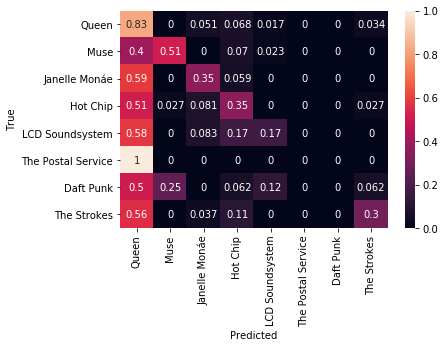

In [50]:
bayes_eval(y_test, y_pred, list_artists)

                    precision    recall  f1-score   support

         Daft Punk       0.00      0.00      0.00        16
          Hot Chip       0.00      0.00      0.00        37
     Janelle Monáe       0.00      0.00      0.00        17
   LCD Soundsystem       0.00      0.00      0.00        12
              Muse       1.00      0.02      0.05        43
             Queen       0.28      1.00      0.44        59
The Postal Service       0.00      0.00      0.00         1
       The Strokes       0.00      0.00      0.00        27

          accuracy                           0.28       212
         macro avg       0.16      0.13      0.06       212
      weighted avg       0.28      0.28      0.13       212



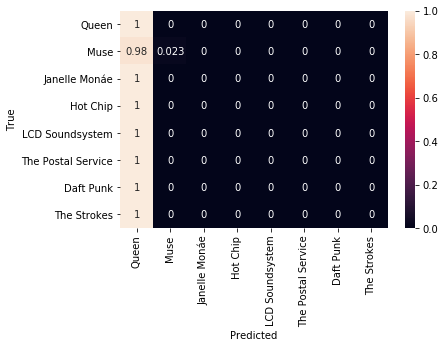

In [51]:
bayes_eval(y_test, y_pred_tfid, list_artists)

In [52]:
# try spacy lemmetization and see what happens
import spacy
model = spacy.load('en_core_web_md') 
X_tokens = [model(song) for song in X]
#X_tokens

In [53]:
X_tokens[2]

Empty spaces, what are we living for? Abandoned places, I guess we know the score, on and on Does anybody know what we are looking for? Another hero, another mindless crime Behind the curtain, in the pantomime Hold the line Does anybody want to take it anymore?  The show must go on The show must go on, yeah Inside my heart is breaking My makeup may be flaking But my smile, still, stays on  Whatever happens, I'll leave it all to chance Another heartache, another failed romance, on and on Does anybody know what we are living for? I guess I'm learning I must be warmer now I'll soon be turning, round the corner now Outside the dawn is breaking But inside in the dark I'm aching to be free  The show must go on The show must go on Inside my heart is breaking My makeup may be flaking But my smile, still, stays on  My soul is painted like the wings of butterflies Fairy tales of yesterday, grow but never die I can fly, my friends  The show must go on The show must go on I'll face it with a grin 

In [54]:
lemmatized_word = []
lemmatized_song = ''
X_lemmatized = []
for song in X_tokens:
    lemmatized_word = []
    for word in song:
        lemmatized_word.append(word.lemma_)
    lemmatized_song = ' '.join(lemmatized_word)
    X_lemmatized.append(lemmatized_song)
X_lemmatized[5]

'" hey , hey , hey , hey , hey hammer to fall "   here -PRON- stand , here -PRON- fall history do not care at all make the bed , light the light Lady Mercy will not be home tonight   -PRON- do not waste no time at all do not hear the bell but -PRON- answer the call -PRON- come to -PRON- as to -PRON- all yeah , and -PRON- be time for the hammer to fall   oh every night , and every day a little piece of -PRON- be fall away but lift -PRON- face the western way build -PRON-   Tow the line and play -PRON- game \' Til the anesthetic cover -PRON- all \' Til one day -PRON- call -PRON- name when -PRON- be time for the hammer to fall   Rich or poor or famous   for -PRON- truth -PRON- be all the same ( oh no , oh no ) lock -PRON- door because rain be pour through -PRON- window pane ( oh no ) baby , now -PRON- trouble be all in vain , yeah   for -PRON- who grow up tall and proud in the shadow of the mushroom cloud convince -PRON- voice can not be hear just wanna scream -PRON- louder and louder and

In [55]:
#try cv and tfidf on lemmatized X
X_train_lem, X_test_lem, y_train, y_test = train_test_split(X_lemmatized, y, test_size=0.33, random_state=42)
cv_lem = CountVectorizer(stop_words='english', lowercase = False, tokenizer = None, token_pattern='[a-z]+')
cv_lem.fit(X_train_lem)
X_train_lemcv = cv_lem.transform(X_train_lem)
X_test_lemcv = cv_lem.transform(X_test_lem) 
cv_lem.get_feature_names()==cv.get_feature_names()

False

                    precision    recall  f1-score   support

         Daft Punk       0.00      0.00      0.00        16
          Hot Chip       0.40      0.38      0.39        37
     Janelle Monáe       0.35      0.35      0.35        17
   LCD Soundsystem       0.25      0.08      0.12        12
              Muse       0.74      0.47      0.57        43
             Queen       0.41      0.81      0.55        59
The Postal Service       0.00      0.00      0.00         1
       The Strokes       0.62      0.30      0.40        27

          accuracy                           0.46       212
         macro avg       0.35      0.30      0.30       212
      weighted avg       0.46      0.46      0.42       212



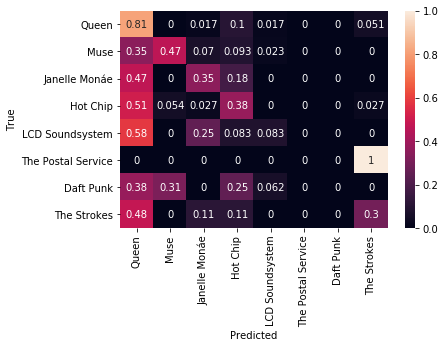

In [56]:
nb.fit(X_train_lemcv, y_train)
y_pred_lemcv = nb.predict(X_test_lemcv)
bayes_eval(y_test, y_pred_lemcv, list_artists) #slightly different

                    precision    recall  f1-score   support

         Daft Punk       0.67      0.12      0.21        16
          Hot Chip       0.42      0.43      0.43        37
     Janelle Monáe       0.33      0.47      0.39        17
   LCD Soundsystem       0.40      0.33      0.36        12
              Muse       0.68      0.70      0.69        43
             Queen       0.63      0.66      0.64        59
The Postal Service       0.00      0.00      0.00         1
       The Strokes       0.62      0.67      0.64        27

          accuracy                           0.55       212
         macro avg       0.47      0.42      0.42       212
      weighted avg       0.57      0.55      0.54       212



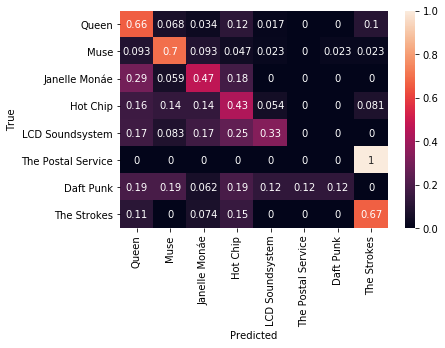

In [57]:
cv_lem = CountVectorizer(stop_words='english', lowercase = False, tokenizer = None, token_pattern='[a-z]+', min_df = 3)
cv_lem.fit(X_train_lem)
X_train_lemcv = cv_lem.transform(X_train_lem)
X_test_lemcv = cv_lem.transform(X_test_lem) 
cv_lem.get_feature_names()==cv.get_feature_names()

nb.fit(X_train_lemcv, y_train)
y_pred_lemcv = nb.predict(X_test_lemcv)
bayes_eval(y_test, y_pred_lemcv, list_artists) #changing min_df to 3 really improved things

                    precision    recall  f1-score   support

         Daft Punk       0.67      0.12      0.21        16
          Hot Chip       0.42      0.43      0.43        37
     Janelle Monáe       0.33      0.47      0.39        17
   LCD Soundsystem       0.40      0.33      0.36        12
              Muse       0.68      0.70      0.69        43
             Queen       0.63      0.66      0.64        59
The Postal Service       0.00      0.00      0.00         1
       The Strokes       0.62      0.67      0.64        27

          accuracy                           0.55       212
         macro avg       0.47      0.42      0.42       212
      weighted avg       0.57      0.55      0.54       212



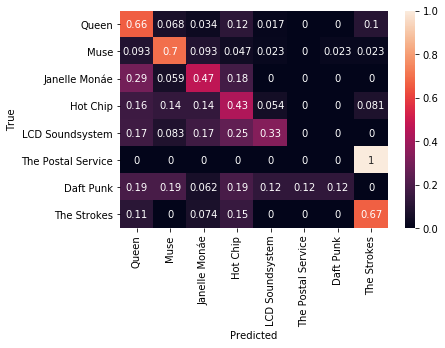

In [58]:
bayes_eval(y_test, y_pred_lemcv, list_artists) #changing min_df to 3 

In [59]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', token_pattern='[a-z]+', min_df= 5)
X_train_lemtf =vectorizer.fit_transform(X_train_lem)
X_test_lemtf = vectorizer.transform(X_test_lem)

                    precision    recall  f1-score   support

         Daft Punk       0.00      0.00      0.00        16
          Hot Chip       0.00      0.00      0.00        37
     Janelle Monáe       0.00      0.00      0.00        17
   LCD Soundsystem       0.00      0.00      0.00        12
              Muse       1.00      0.05      0.09        43
             Queen       0.28      1.00      0.44        59
The Postal Service       0.00      0.00      0.00         1
       The Strokes       0.00      0.00      0.00        27

          accuracy                           0.29       212
         macro avg       0.16      0.13      0.07       212
      weighted avg       0.28      0.29      0.14       212



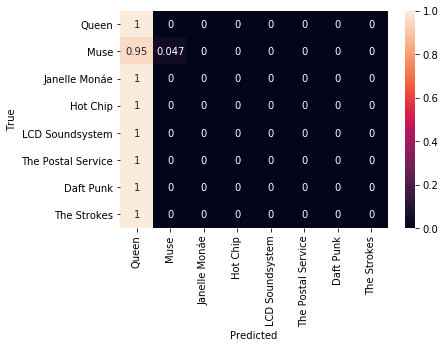

In [60]:
nb.fit(X_train_lemtf, y_train)
y_pred_lemtf = nb.predict(X_test_lemtf)
bayes_eval(y_test, y_pred_lemtf, list_artists) #still really really bad

# oversampling and undersampling

In [61]:
#undersample first
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [62]:
list_artists

['Queen',
 'Muse',
 'Janelle Monáe',
 'Hot Chip',
 'LCD Soundsystem',
 'The Postal Service',
 'Daft Punk',
 'The Strokes']

In [63]:
df_nodupe_title.groupby('main_artist').count()

,artists,titles,lyrics,first_6
main_artist,,,,
Daft Punk,49,49,49,49
Hot Chip,101,101,101,101
Janelle Monáe,55,55,55,55
LCD Soundsystem,44,44,44,44
Muse,118,118,118,118
Queen,203,203,203,203
The Postal Service,7,7,7,7
The Strokes,65,65,65,65


In [95]:
samp_dict = {'Queen':50, 'Muse':50, 'Janelle Monáe':30, 'Hot Chip':30,
             'LCD Soundsystem':30, 'The Postal Service':6, 'Daft Punk':30, 'The Strokes':38 }
rus = RandomUnderSampler(random_state=10, sampling_strategy=samp_dict)
nm = NearMiss(sampling_strategy=samp_dict)

In [96]:
X_rus, y_rus = rus.fit_resample(X_train_lemcv, y_train)
X_nm, y_nm = nm.fit_resample(X_train_lemcv, y_train)

In [97]:
X_rus.shape, y_rus.shape, np.unique(y_rus, return_counts=True) 

((264, 1222),
 (264,),
 (array(['Daft Punk', 'Hot Chip', 'Janelle Monáe', 'LCD Soundsystem',
         'Muse', 'Queen', 'The Postal Service', 'The Strokes'], dtype=object),
  array([30, 30, 30, 30, 50, 50,  6, 38])))

In [67]:
X_nm.shape, y_nm.shape, np.unique(y_nm, return_counts=True) #decreased overall amount of songs by about half

((264, 1222),
 (264,),
 (array(['Daft Punk', 'Hot Chip', 'Janelle Monáe', 'LCD Soundsystem',
         'Muse', 'Queen', 'The Postal Service', 'The Strokes'], dtype=object),
  array([30, 30, 30, 30, 50, 50,  6, 38])))

In [68]:
X_train_lemcv.shape

(430, 1222)

In [ ]:
nb.fit(X_rus, y_rus)
y_pred_rus = nb.predict(X_test_lemcv)

                    precision    recall  f1-score   support

         Daft Punk       0.33      0.12      0.18        16
          Hot Chip       0.53      0.27      0.36        37
     Janelle Monáe       0.29      0.65      0.40        17
   LCD Soundsystem       0.33      0.33      0.33        12
              Muse       0.61      0.58      0.60        43
             Queen       0.47      0.34      0.39        59
The Postal Service       0.00      0.00      0.00         1
       The Strokes       0.42      0.78      0.55        27

          accuracy                           0.44       212
         macro avg       0.37      0.38      0.35       212
      weighted avg       0.47      0.44      0.43       212



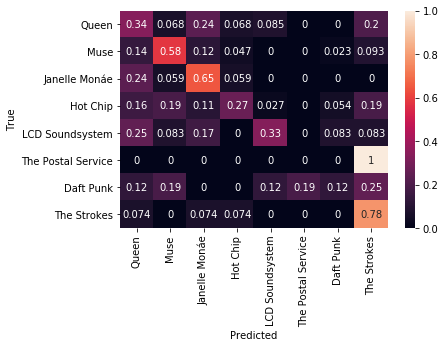

In [69]:
bayes_eval(y_test, y_pred_rus, list_artists) #rus destroyed accuracy - and queen can't be guessed as queen 

In [ ]:
nb.fit(X_nm, y_nm)
y_pred_nm = nb.predict(X_test_lemcv)

                    precision    recall  f1-score   support

         Daft Punk       0.09      0.06      0.07        16
          Hot Chip       0.57      0.22      0.31        37
     Janelle Monáe       0.17      0.35      0.23        17
   LCD Soundsystem       0.15      0.33      0.21        12
              Muse       0.59      0.56      0.57        43
             Queen       0.68      0.44      0.54        59
The Postal Service       0.00      0.00      0.00         1
       The Strokes       0.42      0.70      0.53        27

          accuracy                           0.42       212
         macro avg       0.33      0.33      0.31       212
      weighted avg       0.49      0.42      0.42       212



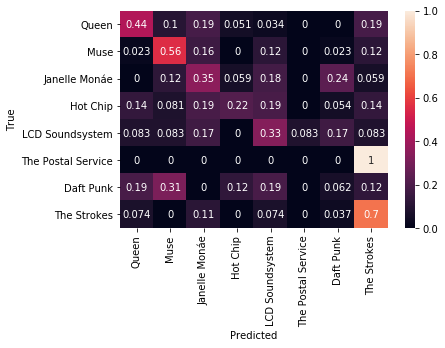

In [70]:
bayes_eval(y_test, y_pred_nm, list_artists) # near miss undersample

In [71]:
# try oversampling instead 

In [72]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
upsample_dict = {'Queen':144, 'Muse':75, 'Janelle Monáe':50, 'Hot Chip':64, 'LCD Soundsystem':50, 
                 'The Postal Service':20, 'Daft Punk':50, 'The Strokes':50 }

ros = RandomOverSampler(random_state=10)

In [73]:
X_ros, y_ros = ros.fit_resample(X_train_lemcv, y_train)

In [74]:
np.unique(y_train, return_counts=True)

(array(['Daft Punk', 'Hot Chip', 'Janelle Monáe', 'LCD Soundsystem',
        'Muse', 'Queen', 'The Postal Service', 'The Strokes'], dtype=object),
 array([ 33,  64,  38,  32,  75, 144,   6,  38]))

In [75]:
np.unique(y_ros, return_counts=True)

(array(['Daft Punk', 'Hot Chip', 'Janelle Monáe', 'LCD Soundsystem',
        'Muse', 'Queen', 'The Postal Service', 'The Strokes'], dtype=object),
 array([144, 144, 144, 144, 144, 144, 144, 144]))

In [ ]:
nb.fit(X_ros, y_ros)
y_pred_ros = nb.predict(X_test_lemcv)

                    precision    recall  f1-score   support

         Daft Punk       0.67      0.12      0.21        16
          Hot Chip       0.34      0.30      0.32        37
     Janelle Monáe       0.22      0.41      0.29        17
   LCD Soundsystem       0.25      0.08      0.12        12
              Muse       0.62      0.65      0.64        43
             Queen       0.56      0.63      0.59        59
The Postal Service       0.00      0.00      0.00         1
       The Strokes       0.59      0.63      0.61        27

          accuracy                           0.49       212
         macro avg       0.41      0.35      0.35       212
      weighted avg       0.50      0.49      0.47       212



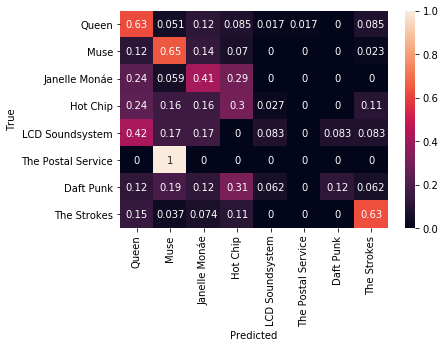

In [76]:
bayes_eval(y_test, y_pred_ros, list_artists) #ros upsample to 144 for each 

In [77]:
from imblearn.over_sampling import SMOTE 

In [78]:
sm = SMOTE(random_state=42)

In [79]:
X_sm, y_sm = sm.fit_resample(X_train_lemcv, y_train)

In [80]:
np.unique(y_sm, return_counts=True)

(array(['Daft Punk', 'Hot Chip', 'Janelle Monáe', 'LCD Soundsystem',
        'Muse', 'Queen', 'The Postal Service', 'The Strokes'], dtype=object),
 array([144, 144, 144, 144, 144, 144, 144, 144]))

In [ ]:
nb.fit(X_sm, y_sm)
y_pred_sm = nb.predict(X_test_lemcv)

                    precision    recall  f1-score   support

         Daft Punk       0.50      0.19      0.27        16
          Hot Chip       0.47      0.38      0.42        37
     Janelle Monáe       0.38      0.53      0.44        17
   LCD Soundsystem       0.25      0.08      0.12        12
              Muse       0.64      0.65      0.64        43
             Queen       0.59      0.76      0.67        59
The Postal Service       0.00      0.00      0.00         1
       The Strokes       0.70      0.70      0.70        27

          accuracy                           0.56       212
         macro avg       0.44      0.41      0.41       212
      weighted avg       0.55      0.56      0.54       212



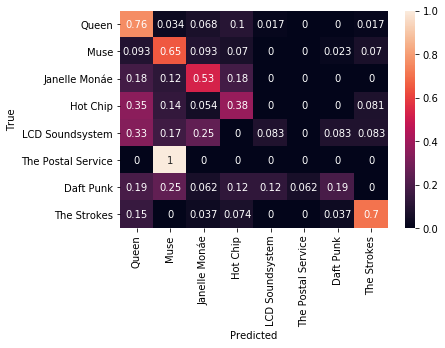

In [81]:
#SMOTE upsample to 144 for each
bayes_eval(y_test, y_pred_sm, list_artists) #works better for me than random 

In [82]:
#combine upsample and down sample

In [83]:
from imblearn.combine import SMOTEENN

In [84]:
samp_dict

{'Queen': 50,
 'Muse': 50,
 'Janelle Monáe': 30,
 'Hot Chip': 30,
 'LCD Soundsystem': 30,
 'The Postal Service': 6,
 'Daft Punk': 30,
 'The Strokes': 38}

In [85]:
sme = SMOTEENN(random_state=42)

In [86]:
X_sme, y_sme = sme.fit_resample(X_train_lemcv, y_train)

In [87]:
np.unique(y_sme, return_counts=True)

(array(['Daft Punk', 'Hot Chip', 'Janelle Monáe', 'LCD Soundsystem',
        'Muse', 'Queen', 'The Postal Service', 'The Strokes'], dtype=object),
 array([121,  70, 110, 105,  49,   2, 142, 121]))

In [ ]:
nb.fit(X_sme, y_sme)
y_pred_sme = nb.predict(X_test_lemcv)

                    precision    recall  f1-score   support

         Daft Punk       0.40      0.12      0.19        16
          Hot Chip       0.43      0.32      0.37        37
     Janelle Monáe       0.18      0.65      0.29        17
   LCD Soundsystem       0.10      0.08      0.09        12
              Muse       0.48      0.49      0.48        43
             Queen       0.45      0.08      0.14        59
The Postal Service       0.00      0.00      0.00         1
       The Strokes       0.43      0.81      0.56        27

          accuracy                           0.35       212
         macro avg       0.31      0.32      0.27       212
      weighted avg       0.40      0.35      0.32       212



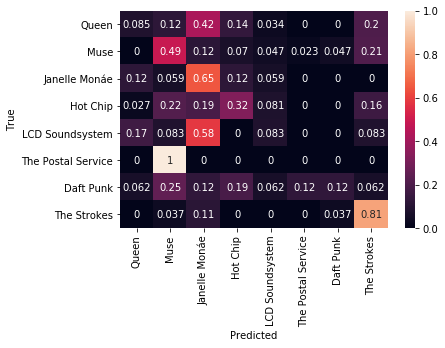

In [88]:
bayes_eval(y_test, y_pred_sme, list_artists) #that really killed accuracy, why did it bring the queen songs down to 2? 

In [89]:
from imblearn.combine import SMOTETomek
upsample_dict

{'Queen': 144,
 'Muse': 75,
 'Janelle Monáe': 50,
 'Hot Chip': 64,
 'LCD Soundsystem': 50,
 'The Postal Service': 20,
 'Daft Punk': 50,
 'The Strokes': 50}

In [126]:
smt_dict = {'Queen': 144,'Muse': 100,'Janelle Monáe': 60, 'Hot Chip': 64, 'LCD Soundsystem': 60,'The Postal Service': 30,'Daft Punk': 60,'The Strokes': 60}
smt = SMOTETomek(random_state=42 )
sampling_strategy=smt_dict
X_smt, y_smt = smt.fit_resample(X_train_lemcv, y_train)
nb.fit(X_smt, y_smt)
y_pred_smt = nb.predict(X_test_lemcv)

                    precision    recall  f1-score   support

         Daft Punk       0.50      0.19      0.27        16
          Hot Chip       0.47      0.38      0.42        37
     Janelle Monáe       0.38      0.53      0.44        17
   LCD Soundsystem       0.25      0.08      0.12        12
              Muse       0.64      0.65      0.64        43
             Queen       0.59      0.76      0.67        59
The Postal Service       0.00      0.00      0.00         1
       The Strokes       0.70      0.70      0.70        27

          accuracy                           0.56       212
         macro avg       0.44      0.41      0.41       212
      weighted avg       0.55      0.56      0.54       212



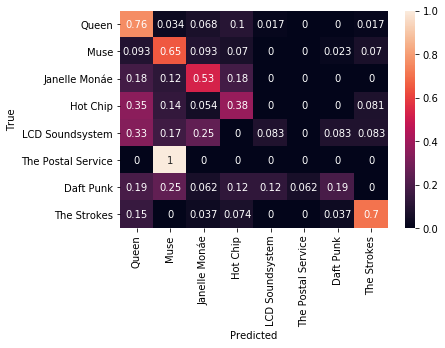

In [128]:
bayes_eval(y_test, y_pred_smt, list_artists) #SMOTETomek looks the same as SMOTE - 144 songs for each

In [91]:
# if time, write function to optimize the upsampling 

In [92]:
# make word clouds for fun 

In [93]:
from matplotlib import pyplot as plt
import wordcloud

#mask = np.____((500, ____, 3), _____)
#mask[150:350,____:350,:] = 255  # masked out area
def make_wordclouds(all_songs_list):
    fig, axs = plt.subplots(nrows=4, ncols=2,figsize=(10, 10))
    axs = axs.flatten()
    list_artists = ['Queen', 'Muse', 'Janelle Monáe', 'Hot Chip', 'LCD Soundsystem','The Postal Service', 'Daft Punk', 'The Strokes']
#     axes_list =[ ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
    for i, artist_list in enumerate(allsongs_list):
        cloud = wordcloud.WordCloud(background_color="white",
                max_words=50,
                collocations=True,  # calculates frequencies
                contour_color='steelblue').generate(''.join(artist_list))
                # stop words are removed!
        axs[i].imshow(cloud, interpolation='bilinear')
        axs[i].axis('off')
        name = str(artist_list)
        axs[i].set_title(str(list_artists[i]))
    
plt.show()

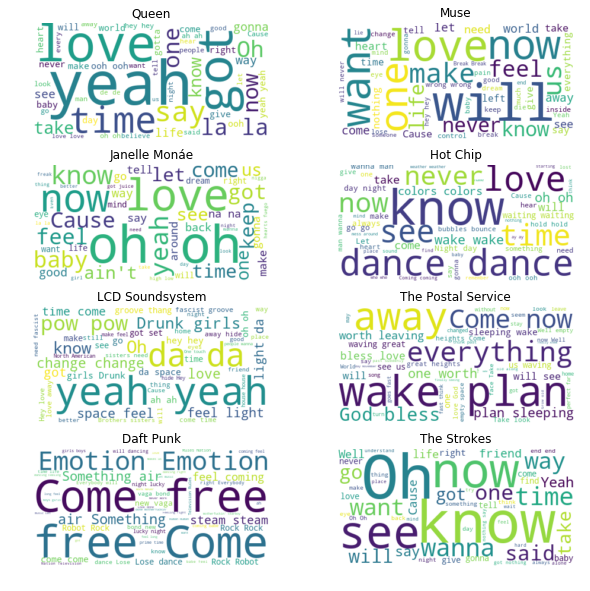

In [122]:
make_wordclouds(allsongs_list)

In [99]:
#trying a random forest classifier for fun 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [100]:
rfc.fit(X_train_lemcv, y_train)
y_pred_rfc = rfc.predict(X_test_lemcv)

                    precision    recall  f1-score   support

         Daft Punk       0.42      0.31      0.36        16
          Hot Chip       0.90      0.24      0.38        37
     Janelle Monáe       0.00      0.00      0.00        17
   LCD Soundsystem       1.00      0.08      0.15        12
              Muse       0.65      0.65      0.65        43
             Queen       0.37      0.92      0.53        59
The Postal Service       0.00      0.00      0.00         1
       The Strokes       0.00      0.00      0.00        27

          accuracy                           0.46       212
         macro avg       0.42      0.28      0.26       212
      weighted avg       0.48      0.46      0.38       212



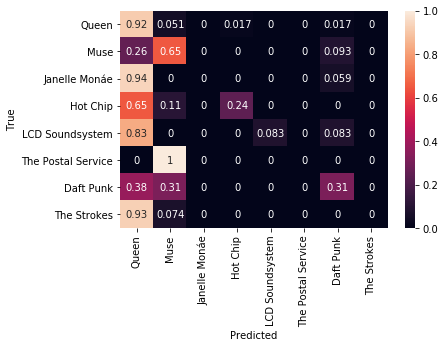

In [101]:
bayes_eval(y_test, y_pred_rfc, list_artists) #randomforest did a little worse than the bayes

In [102]:
samp_dict

{'Queen': 50,
 'Muse': 50,
 'Janelle Monáe': 30,
 'Hot Chip': 30,
 'LCD Soundsystem': 30,
 'The Postal Service': 6,
 'Daft Punk': 30,
 'The Strokes': 38}

In [103]:
upsample_dict

{'Queen': 144,
 'Muse': 75,
 'Janelle Monáe': 50,
 'Hot Chip': 64,
 'LCD Soundsystem': 50,
 'The Postal Service': 20,
 'Daft Punk': 50,
 'The Strokes': 50}

In [104]:
downsam_dict = {'Queen': 100,
 'Muse': 75,
 'Janelle Monáe': 50,
 'Hot Chip': 64,
 'LCD Soundsystem': 50,
 'The Postal Service': 20,
 'Daft Punk': 40,
 'The Strokes': 50}

In [105]:
np.unique(y_train, return_counts=True)

(array(['Daft Punk', 'Hot Chip', 'Janelle Monáe', 'LCD Soundsystem',
        'Muse', 'Queen', 'The Postal Service', 'The Strokes'], dtype=object),
 array([ 33,  64,  38,  32,  75, 144,   6,  38]))

In [106]:
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import make_pipeline
upsmote= SMOTE(random_state=42, sampling_strategy= upsample_dict)
enn = EditedNearestNeighbours() # this works poorly in the pipeline 
rus = RandomUnderSampler(random_state=42, sampling_strategy=downsam_dict)

In [107]:
up_down_pipeline = make_pipeline(upsmote, rus, nb)

In [108]:
up_down_pipeline.fit(X_train_lemcv, y_train)

Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=42,
                       sampling_strategy={'Daft Punk': 50, 'Hot Chip': 64,
                                          'Janelle Monáe': 50,
                                          'LCD Soundsystem': 50, 'Muse': 75,
                                          'Queen': 144,
                                          'The Postal Service': 20,
                                          'The Strokes': 50})),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42, replacement=False,
                                    sampling_strategy={'Daft Punk': 40,
                                                       'Hot Chip': 64,
                                                       'Janelle Monáe': 50,
                                                       'LCD Soundsystem': 50,
                                                       'Muse': 75, 'Queen

In [109]:
y_pred_pipeline = up_down_pipeline.predict(X_test_lemcv)

                    precision    recall  f1-score   support

         Daft Punk       0.25      0.06      0.10        16
          Hot Chip       0.44      0.41      0.42        37
     Janelle Monáe       0.33      0.65      0.44        17
   LCD Soundsystem       0.20      0.08      0.12        12
              Muse       0.67      0.67      0.67        43
             Queen       0.58      0.56      0.57        59
The Postal Service       0.00      0.00      0.00         1
       The Strokes       0.53      0.67      0.59        27

          accuracy                           0.51       212
         macro avg       0.38      0.39      0.36       212
      weighted avg       0.50      0.51      0.49       212



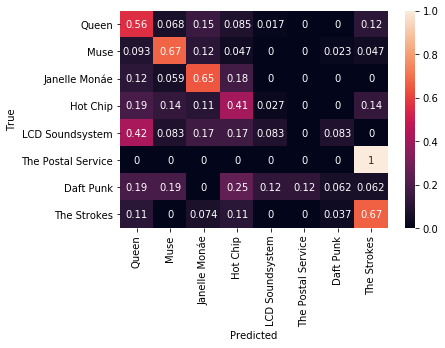

In [110]:
bayes_eval(y_test, y_pred_pipeline, list_artists) # Is this better? Unclear

In [111]:
#try pipeline with tfidf vectorized data
up_down_pipeline.fit(X_train_lemtf, y_train)

Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=42,
                       sampling_strategy={'Daft Punk': 50, 'Hot Chip': 64,
                                          'Janelle Monáe': 50,
                                          'LCD Soundsystem': 50, 'Muse': 75,
                                          'Queen': 144,
                                          'The Postal Service': 20,
                                          'The Strokes': 50})),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42, replacement=False,
                                    sampling_strategy={'Daft Punk': 40,
                                                       'Hot Chip': 64,
                                                       'Janelle Monáe': 50,
                                                       'LCD Soundsystem': 50,
                                                       'Muse': 75, 'Queen

In [112]:
y_pred_pipeline_tf = up_down_pipeline.predict(X_test_lemtf)

                    precision    recall  f1-score   support

         Daft Punk       0.25      0.06      0.10        16
          Hot Chip       0.44      0.41      0.42        37
     Janelle Monáe       0.33      0.65      0.44        17
   LCD Soundsystem       0.20      0.08      0.12        12
              Muse       0.67      0.67      0.67        43
             Queen       0.58      0.56      0.57        59
The Postal Service       0.00      0.00      0.00         1
       The Strokes       0.53      0.67      0.59        27

          accuracy                           0.51       212
         macro avg       0.38      0.39      0.36       212
      weighted avg       0.50      0.51      0.49       212



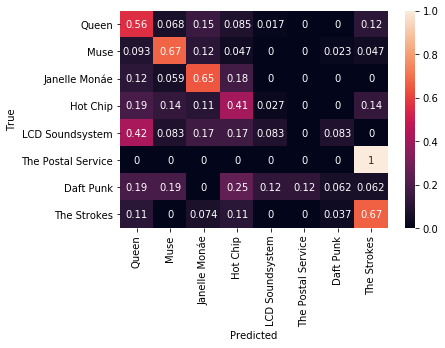

In [113]:
bayes_eval(y_test, y_pred_pipeline, list_artists) #with resampling, looks essentially the same was with cv 

In [124]:
accuracy_summary = {'Strategy':['CV', 'Tfidf', 'CV+lemma', 'CV+lemma+min_df','Tfidf+lemma', 'Tfidf+lemma+min_df', 
                   'CV+lemma+Rus', 
                   'CV+lemma+NearMiss', 'CV+lemma+Ros', 'CV+lemma+SMOTE', 'CV+lemma+smoteteen', 
                   'CV+lemma+Smotetomek','Random Forest - CV+lemma', 'CV+lemma+pipeline', 
                   'Tfidf+lemma+pipeline'], 'Accuracy':[0.47, 0.28, 0.55, 0.55, 0.28,
                                                                                    0.29, 0.44, 0.42, 0.49,0.56,
                                                                                    0.35, 0.53, 0.45, 0.51, 0.51]}
df_summary = pd.DataFrame(accuracy_summary, columns = ['Strategy', 'Accuracy'])

In [125]:
df_summary.sort_values('Accuracy', ascending = False)

,Strategy,Accuracy
9,CV+lemma+SMOTE,0.56
2,CV+lemma,0.55
3,CV+lemma+min_df,0.55
11,CV+lemma+Smotetomek,0.53
13,CV+lemma+pipeline,0.51
14,Tfidf+lemma+pipeline,0.51
8,CV+lemma+Ros,0.49
0,CV,0.47
12,Random Forest - CV+lemma,0.45
6,CV+lemma+Rus,0.44


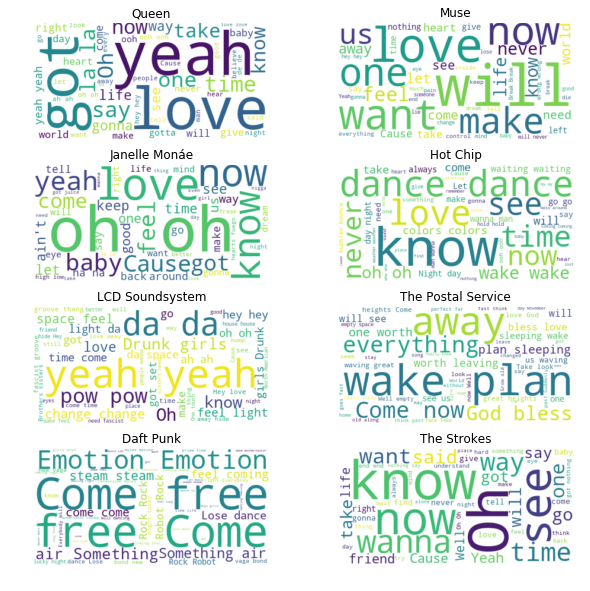

In [123]:
make_wordclouds(allsongs_list)

### What I've learned from doing this: 
- Lemmatization makes a big difference 
- Several issues with really small sample sizes
    - in training
    - in calculating accuracy 
- Pipelines/resampling/etc. 
### Further questions: 
- How to more effectively use Spacy 
- How can we use Spacy to effectively look at document similarity 
- Upsampling before tfidf? 
### Things to add to this project: 
- Combine into single py file with the best looking model, allow user input of new song for test (in progress)
- Iteratively remove artists to see what the best combination is 
- Iterirate through different values for the sampling strategies to optimize pipeline
- Add features - usage of parts of speech, sentiment analysis 
- Mask word clouds onto some kind of symbol/art for the artist
- Add Spotify playlist

In [116]:
!dbus-send --print-reply --dest=org.mpris.MediaPlayer2.spotify /org/mpris/MediaPlayer2 org.mpris.MediaPlayer2.Player.Play




dbus[35036]: Dynamic session lookup supported but failed: launchd did not provide a socket path, verify that org.freedesktop.dbus-session.plist is loaded!
Failed to open connection to "session" message bus: Not enough memory


In [117]:
#try the spacy with spacys own vectorization
type(X_tokens[1])

spacy.tokens.doc.Doc

In [118]:
#turn each word into a vector
def vector(tokens):
  
    song_vectors = []
    for item in tokens:
        word_vectors=[]
        for word in item:   
            word_vectors.append(model.vocab[word].vector)
    song_vectors.append(word_vectors)
    return song_vectors

In [119]:
#totally confused
spacy_vectors = vector(X_tokens)

TypeError: an integer is required

In [120]:
from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups

lookups = Lookups()
lemmatizer = Lemmatizer(lookups)
X_lemmas = lemmatizer(X)
print(X_lemmas)

#this is a dead end - lemmatizer is only for single words maybe? 

TypeError: __call__() missing 1 required positional argument: 'univ_pos'

In [121]:
# make lists for each artist 
# maybe this was unecessary 

queen_list = df_nodupe_title[df_nodupe_title['main_artist']=='Queen'].lyrics.to_list()
muse_list = df_nodupe_title[df_nodupe_title['main_artist']=='Muse'].lyrics.to_list()
janelle_list = df_nodupe_title[df_nodupe_title['main_artist']=='Janelle Monáe'].lyrics.to_list()
hotchip_list = df_nodupe_title[df_nodupe_title['main_artist']=='Hot Chip'].lyrics.to_list()
lcd_list = df_nodupe_title[df_nodupe_title['main_artist']=='LCD Soundsystem'].lyrics.to_list()
postalservice_list = df_nodupe_title[df_nodupe_title['main_artist']=='The Postal Service'].lyrics.to_list()
daftpunk_list = df_nodupe_title[df_nodupe_title['main_artist']=='Daft Punk'].lyrics.to_list()
strokes_list = df_nodupe_title[df_nodupe_title['main_artist']=='The Strokes'].lyrics.to_list()

allsongs_list = [queen_list, muse_list, janelle_list, hotchip_list, lcd_list, postalservice_list, daftpunk_list,strokes_list]

#there has got to be a better way to do this, but can't change the list name in a for loop 

#for artist in list_artists:
   #lyrics_dict = df_nodupe_title[df_nodupe_title['main_artist']==str(artist)].lyrics.to_dict()
    
#df_nodupe_title.index = df_nodupe_title.main_artist
#lyrics_dict = df_nodupe_title.to_dict('index')# dictionary is overwriting
    